In [1]:
# Setting up CoinMarketCap API requests w/ my unique API Key
# If you're using my code from GitHub, make sure you change your data limit to allow max amounts -JDrummond 
    # from the command line:
    # jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10
# For the sake of this demo, I'm setting my API 'limit' to 5 just to keep my RAM unused

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'PUT YOUR API KEY HERE',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-01-13T09:34:50.849Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 8869}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9927, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
# One way to check the data type so you can clean it a bit

type(data)

dict

In [3]:
# let's import pandas with the alias of 'as'
# test .json_normalize to check if it's sorting correctly 
# it should be displaying in standard notation, we will change that later 

import pandas as pd

pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9927,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.926069e+07,1.926069e+07,...,3.636967e+11,40.0738,3.965399e+11,None,2023-01-13T09:32:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6354,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,1.726944e+11,19.0309,1.726944e+11,None,2023-01-13T09:32:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,46061,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.627259e+10,7.314177e+10,...,6.627986e+10,7.3032,7.314979e+10,None,2023-01-13T09:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.599625e+08,1.599800e+08,...,4.600816e+10,5.0694,5.752368e+10,None,2023-01-13T09:32:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,9499,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.401216e+10,4.401216e+10,...,4.401815e+10,4.8508,4.401815e+10,None,2023-01-13T09:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48


In [4]:
# if all is sorted correctly, set option display to max columns 
# if you're pulling in a lot of rows and not limited to 5, use:
    # pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)
pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9927,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.926069e+07,1.926069e+07,NaN,1,None,None,None,2023-01-13T09:32:00.000Z,18882.851946,3.105306e+10,29.8285,0.162271,4.004536,12.495477,5.975019,13.005685,-1.157297,3.636967e+11,40.0738,3.965399e+11,None,2023-01-13T09:32:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6354,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,None,None,None,2023-01-13T09:32:00.000Z,1411.203616,9.411786e+09,-1.3537,0.080815,0.777961,13.079206,6.678224,12.202012,10.058802,1.726944e+11,19.0309,1.726944e+11,None,2023-01-13T09:32:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,46061,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.627259e+10,7.314177e+10,NaN,3,None,None,None,2023-01-13T09:32:00.000Z,1.000110,3.791507e+10,22.3751,-0.000619,0.008623,0.037252,0.011773,0.103101,0.002771,6.627986e+10,7.3032,7.314979e+10,None,2023-01-13T09:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.599625e+08,1.599800e+08,NaN,4,None,None,None,2023-01-13T09:32:00.000Z,287.618395,6.236467e+08,17.0298,-0.138401,1.435602,11.985844,4.600440,2.181555,6.719690,4.600816e+10,5.0694,5.752368e+10,None,2023-01-13T09:32:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,9499,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.401216e+10,4.401216e+10,NaN,5,None,None,None,2023-01-13T09:32:00.000Z,1.000136,3.642737e+09,-6.9485,0.008302,0.013690,0.010680,0.009762,-0.012836,0.018431,4.401815e+10,4.8508,4.401815e+10,None,2023-01-13T09:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48


In [6]:
# let's add a timestamp to show when pulls were fetched and place it in a 'df' variable 

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9927,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.926069e+07,1.926069e+07,NaN,1,None,None,None,2023-01-13T09:32:00.000Z,18882.851946,3.105306e+10,29.8285,0.162271,4.004536,12.495477,5.975019,13.005685,-1.157297,3.636967e+11,40.0738,3.965399e+11,None,2023-01-13T09:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-13 09:42:37.722299+00:00
1,1027,Ethereum,ETH,ethereum,6354,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,None,None,None,2023-01-13T09:32:00.000Z,1411.203616,9.411786e+09,-1.3537,0.080815,0.777961,13.079206,6.678224,12.202012,10.058802,1.726944e+11,19.0309,1.726944e+11,None,2023-01-13T09:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-13 09:42:37.722299+00:00
2,825,Tether,USDT,tether,46061,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.627259e+10,7.314177e+10,NaN,3,None,None,None,2023-01-13T09:32:00.000Z,1.000110,3.791507e+10,22.3751,-0.000619,0.008623,0.037252,0.011773,0.103101,0.002771,6.627986e+10,7.3032,7.314979e+10,None,2023-01-13T09:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-13 09:42:37.722299+00:00
3,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.599625e+08,1.599800e+08,NaN,4,None,None,None,2023-01-13T09:32:00.000Z,287.618395,6.236467e+08,17.0298,-0.138401,1.435602,11.985844,4.600440,2.181555,6.719690,4.600816e+10,5.0694,5.752368e+10,None,2023-01-13T09:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-13 09:42:37.722299+00:00
4,3408,USD Coin,USDC,usd-coin,9499,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.401216e+10,4.401216e+10,NaN,5,None,None,None,2023-01-13T09:32:00.000Z,1.000136,3.642737e+09,-6.9485,0.008302,0.013690,0.010680,0.009762,-0.012836,0.018431,4.401815e+10,4.8508,4.401815e+10,None,2023-01-13T09:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-13 09:42:37.722299+00:00


In [8]:
# let's create a function to store all this so we can automate it later to a .csv
# If you don't want to create a .csv file, create a second dataframe so you can append to new table 
    # first, delete or comment out the if else function for the .csv append. then:
    #    df2 = pd.json_normalize(data['data'])
    #    df2['timestamp'] = pd.to_datetime('now', utc=True)
    #    df_append = pd.DataFrame(df2)
    #    df = pd.concat([df2, df_append])

def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'PUT YOUR API KEY HERE',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    df
    
    # write this pulled data into a .csv file 
    
    if not os.path.isfile(r'C:\Users\pc-47\Desktop\Python SQL\CMC_API.csv'):
        df.to_csv(r'C:\Users\pc-47\Desktop\Python SQL\CMC_API.csv', header = 'columns_names')
    else:
       df.to_csv(r'C:\Users\pc-47\Desktop\Python SQL\CMC_API.csv', mode = 'a', header=False) 

In [9]:
# Setting our loop to 333 times because that is our daily limit with CMC 
# I'll set the sleep time for 10 seconds for the sake of this code, but if you really wanted this API, set it to 
    # whatever variable amount of time you want to use 333 times per day

import os
from time import time 
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Pull Completed')
    sleep(10)
exit()

{'status': {'timestamp': '2023-01-13T10:17:59.907Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 8870}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9927, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

{'status': {'timestamp': '2023-01-13T10:18:21.632Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 8870}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9927, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

KeyboardInterrupt: 

In [10]:
# We can use pandas to read our .csv file here if we want
# save it into a new variable to call later if needed

df_csv = pd.read_csv(r'C:\Users\pc-47\Desktop\Python SQL\CMC_API.csv')
df_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9927,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.926075e+07,1.926075e+07,NaN,1,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,18938.451893,3.126516e+10,30.0784,0.374100,4.336653,12.801453,6.304147,13.206266,-0.915804,3.647688e+11,40.1578,3.977075e+11,NaN,2023-01-13T10:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-13 10:18:01.294548+00:00
1,1,1027,Ethereum,ETH,ethereum,6355,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,1411.447679,9.407773e+09,-2.1514,0.002804,1.015307,13.105624,6.739191,12.396037,10.151138,1.727243e+11,19.0085,1.727243e+11,NaN,2023-01-13T10:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-13 10:18:01.294548+00:00
2,2,825,Tether,USDT,tether,46062,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.627259e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,1.000122,3.807800e+10,22.3076,-0.000526,0.007998,0.036863,0.012692,0.112347,0.006716,6.628068e+10,7.2970,7.315070e+10,NaN,2023-01-13T10:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-13 10:18:01.294548+00:00
3,3,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.0,1.599625e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,287.765600,6.204814e+08,15.6133,-0.026663,1.973207,12.217093,5.023784,1.729408,6.561542,4.603170e+10,5.0677,5.755312e+10,NaN,2023-01-13T10:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-13 10:18:01.294548+00:00
4,4,3408,USD Coin,USDC,usd-coin,9500,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.402507e+10,4.402507e+10,NaN,5,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,1.000155,3.649563e+09,-7.3847,0.004674,0.031760,0.018347,0.008220,-0.010841,0.013000,4.403191e+10,4.8458,4.403191e+10,NaN,2023-01-13T10:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-13 10:18:01.294548+00:00
5,0,1,Bitcoin,BTC,bitcoin,9927,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.926075e+07,1.926075e+07,NaN,1,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,18938.451893,3.126516e+10,30.0784,0.374100,4.336653,12.801453,6.304147,13.206266,-0.915804,3.647688e+11,40.1578,3.977075e+11,NaN,2023-01-13T10:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-13 10:18:12.325461+00:00
6,1,1027,Ethereum,ETH,ethereum,6355,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,1411.447679,9.407773e+09,-2.1514,0.002804,1.015307,13.105624,6.739191,12.396037,10.151138,1.727243e+11,19.0085,1.727243e+11,NaN,2023-01-13T10:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-13 10:18:12.325461+00:00
7,2,825,Tether,USDT,tether,46062,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.627259e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,1.000122,3.807800e+10,22.3076,-0.000526,0.007998,0.036863,0.012692,0.112347,0.006716,6.628068e+10,7.2970,7.315070e+10,NaN,2023-01-13T10:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-13 10:18:12.325461+00:00
8,3,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"['marketplace', 'cent

In [11]:
# let's clean the scientific notation so it's easier to read

pd. set_option('display.float_format', lambda x: '%.5f' % x)
df_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9927,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19260750.00000,19260750.00000,NaN,1,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,18938.45189,31265161337.78185,30.07840,0.37410,4.33665,12.80145,6.30415,13.20627,-0.91580,364768787299.69171,40.15780,397707489754.73999,NaN,2023-01-13T10:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-13 10:18:01.294548+00:00
1,1,1027,Ethereum,ETH,ethereum,6355,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,1411.44768,9407773262.22925,-2.15140,0.00280,1.01531,13.10562,6.73919,12.39604,10.15114,172724309424.20474,19.00850,172724309424.20001,NaN,2023-01-13T10:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-13 10:18:01.294548+00:00
2,2,825,Tether,USDT,tether,46062,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,66272586193.09214,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,1.00012,38077995493.65028,22.30760,-0.00053,0.00800,0.03686,0.01269,0.11235,0.00672,66280678142.06227,7.29700,73150697003.96001,NaN,2023-01-13T10:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-13 10:18:01.294548+00:00
3,3,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,159962494.80476,159979963.59043,NaN,4,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,287.76560,620481400.03583,15.61330,-0.02666,1.97321,12.21709,5.02378,1.72941,6.56154,46031703343.46019,5.06770,57553120060.61000,NaN,2023-01-13T10:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-13 10:18:01.294548+00:00
4,4,3408,USD Coin,USDC,usd-coin,9500,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,44025073052.18904,44025073052.18904,NaN,5,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,1.00016,3649563318.01808,-7.38470,0.00467,0.03176,0.01835,0.00822,-0.01084,0.01300,44031910081.68890,4.84580,44031910081.69000,NaN,2023-01-13T10:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-13 10:18:01.294548+00:00
5,0,1,Bitcoin,BTC,bitcoin,9927,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19260750.00000,19260750.00000,NaN,1,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,18938.45189,31265161337.78185,30.07840,0.37410,4.33665,12.80145,6.30415,13.20627,-0.91580,364768787299.69171,40.15780,397707489754.73999,NaN,2023-01-13T10:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-13 10:18:12.325461+00:00
6,1,1027,Ethereum,ETH,ethereum,6355,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,1411.44768,9407773262.22925,-2.15140,0.00280,1.01531,13.10562,6.73919,12.39604,10.15114,172724309424.20474,19.00850,172724309424.20001,NaN,2023-01-13T10:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-13 10:18:12.325461+00:00
7,2,825,Tether,USDT,tether,46062,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,66272586193.09214,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-01-13T10:15:00.000Z,1.00012,38077995493.65028,22.30760,-0.00053,0.00800,0.03686,0.01269,0.11235,0.00672,66280678142.06227,7.29700,73150697003.96001,NaN,2023-01-13T10:15:00.000Z,1027.00000,Ethereum

In [13]:
# let's now group by 'name' of crypto by the average/mean so we can combine btc, eth, etc. 
# NOTE: you can't group by unless it's a mean, median, mode, etc

df_grouped = df_csv.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df_grouped

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.36419,4.35384,12.80593,6.30511,13.22011,-0.91491
Ethereum,-0.01519,1.00826,13.08921,6.72879,12.39383,10.13348
Tether,0.00056,0.00895,0.03806,0.01326,0.11052,0.00679
BNB,-0.03126,1.96352,12.19771,5.00433,1.72200,6.53653
USD Coin,0.00444,0.02436,0.01272,0.00603,-0.01231,0.00830


In [14]:
# We can't use pulled data to visualize unless we stack or pivot it to rows, not columns 
# So let's convert this data frame to a stack 
# NOTE: stacked data in pandas will be stored as a 'core.series' not in a data frame

df_stack = df_grouped.stack()
df_stack

name                                  
Bitcoin   quote.USD.percent_change_1h     0.36419
          quote.USD.percent_change_24h    4.35384
          quote.USD.percent_change_7d    12.80593
          quote.USD.percent_change_30d    6.30511
          quote.USD.percent_change_60d   13.22011
          quote.USD.percent_change_90d   -0.91491
Ethereum  quote.USD.percent_change_1h    -0.01519
          quote.USD.percent_change_24h    1.00826
          quote.USD.percent_change_7d    13.08921
          quote.USD.percent_change_30d    6.72879
          quote.USD.percent_change_60d   12.39383
          quote.USD.percent_change_90d   10.13348
Tether    quote.USD.percent_change_1h     0.00056
          quote.USD.percent_change_24h    0.00895
          quote.USD.percent_change_7d     0.03806
          quote.USD.percent_change_30d    0.01326
          quote.USD.percent_change_60d    0.11052
          quote.USD.percent_change_90d    0.00679
BNB       quote.USD.percent_change_1h    -0.03126
          q

In [15]:
# Convert the series back to a data frame sorted by 'values' we create 

df_DataFrames = df_stack.to_frame(name='values')
df_DataFrames

values
name                                          
Bitcoin  quote.USD.percent_change_1h   0.36419
         quote.USD.percent_change_24h  4.35384
         quote.USD.percent_change_7d  12.80593
         quote.USD.percent_change_30d  6.30511
         quote.USD.percent_change_60d 13.22011
         quote.USD.percent_change_90d -0.91491
Ethereum quote.USD.percent_change_1h  -0.01519
         quote.USD.percent_change_24h  1.00826
         quote.USD.percent_change_7d  13.08921
         quote.USD.percent_change_30d  6.72879
         quote.USD.percent_change_60d 12.39383
         quote.USD.percent_change_90d 10.13348
Tether   quote.USD.percent_change_1h   0.00056
         quote.USD.percent_change_24h  0.00895
         quote.USD.percent_change_7d   0.03806
         quote.USD.percent_change_30d  0.01326
         quote.USD.percent_change_60d  0.11052
         quote.USD.percent_change_90d  0.00679
BNB      quote.USD.percent_change_1h  -0.03126
         quote.USD.percent_change_24h  1.96352
         quote.USD.percent_change_7d  12.19771
         quote.USD.percent_change_30d  5.00433
         quote.USD.percent_change_60d  1.72200
         quote.USD.percent_change_90d  6.53653
USD Coin quote.USD.percent_change_1h   0.00444
         quote.USD.percent_change_24h  0.02436
         quote.USD.percent_change_7d   0.01272
         quote.USD.percent_change_30d  0.00603
         quote.USD.percent_change_60d -0.01231
         quote.USD.percent_change_90d  0.00830

In [16]:
# Use .count() to see how many values I've called so far

df_DataFrames.count()

values    30
dtype: int64

In [17]:
# Need to get rid of 'name' being used as the index, so let's reset the index to read our current state of our data 

index = pd.Index(range(30))

df_index = df_DataFrames.reset_index()
df_index

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.36419
1,Bitcoin,quote.USD.percent_change_24h,4.35384
2,Bitcoin,quote.USD.percent_change_7d,12.80593
3,Bitcoin,quote.USD.percent_change_30d,6.30511
4,Bitcoin,quote.USD.percent_change_60d,13.22011
5,Bitcoin,quote.USD.percent_change_90d,-0.91491
6,Ethereum,quote.USD.percent_change_1h,-0.01519
7,Ethereum,quote.USD.percent_change_24h,1.00826
8,Ethereum,quote.USD.percent_change_7d,13.08921
9,Ethereum,quote.USD.percent_change_30d,6.72879


In [19]:
# Let's rename the 'level_1' column and store it in a new variable 

df_rename = df_index.rename(columns={'level_1': 'percent_change'})
df_rename

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.36419
1,Bitcoin,quote.USD.percent_change_24h,4.35384
2,Bitcoin,quote.USD.percent_change_7d,12.80593
3,Bitcoin,quote.USD.percent_change_30d,6.30511
4,Bitcoin,quote.USD.percent_change_60d,13.22011
5,Bitcoin,quote.USD.percent_change_90d,-0.91491
6,Ethereum,quote.USD.percent_change_1h,-0.01519
7,Ethereum,quote.USD.percent_change_24h,1.00826
8,Ethereum,quote.USD.percent_change_7d,13.08921
9,Ethereum,quote.USD.percent_change_30d,6.72879


In [27]:
# let's change the 'percent_change' to only the hour to set up our x axis

df_rename['percent_change'] = df_rename['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df_rename

,name,percent_change,values
0,Bitcoin,1h,0.36419
1,Bitcoin,24h,4.35384
2,Bitcoin,7d,12.80593
3,Bitcoin,30d,6.30511
4,Bitcoin,60d,13.22011
5,Bitcoin,90d,-0.91491
6,Ethereum,1h,-0.01519
7,Ethereum,24h,1.00826
8,Ethereum,7d,13.08921
9,Ethereum,30d,6.72879


In [23]:
# let's start to visualize this data above with seaborn and matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

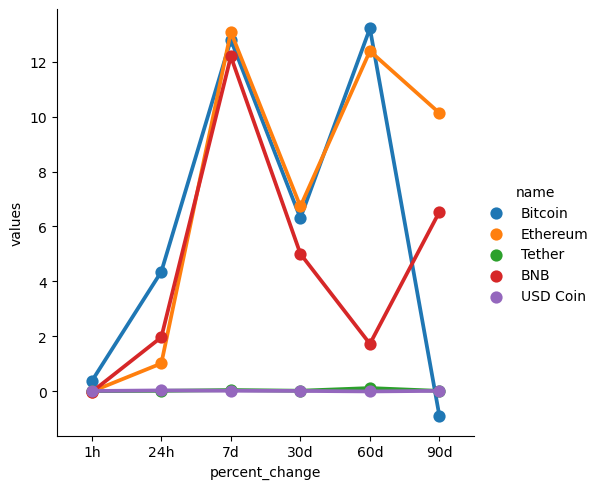

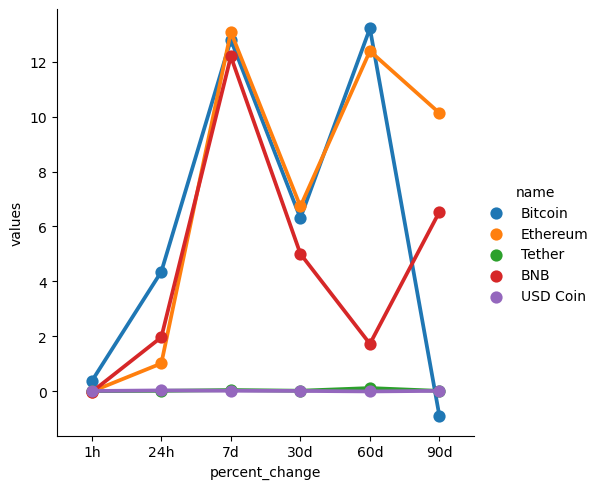

In [25]:
# let's look at all our data thus far

sns.catplot(x='percent_change', y='values', hue='name', data=df_rename, kind='point')
plt.show()

In [30]:
# let's just look at the price of our crypto from our original data frame .csv API data pulls  

df_price = df_csv[['name', 'quote.USD.price', 'timestamp']]
df_price

,name,quote.USD.price,timestamp
0,Bitcoin,18938.45189,2023-01-13 10:18:01.294548+00:00
1,Ethereum,1411.44768,2023-01-13 10:18:01.294548+00:00
2,Tether,1.00012,2023-01-13 10:18:01.294548+00:00
3,BNB,287.76560,2023-01-13 10:18:01.294548+00:00
4,USD Coin,1.00016,2023-01-13 10:18:01.294548+00:00
5,Bitcoin,18938.45189,2023-01-13 10:18:12.325461+00:00
6,Ethereum,1411.44768,2023-01-13 10:18:12.325461+00:00
7,Tether,1.00012,2023-01-13 10:18:12.325461+00:00
8,BNB,287.76560,2023-01-13 10:18:12.325461+00:00
9,USD Coin,1.00016,2023-01-13 10:18:12.325461+00:00


In [32]:
# let's 'query' into this list now and just select 'Bitcoin' with the timestamps of when we pulled it

df_price = df_csv[['name', 'quote.USD.price', 'timestamp']]
df_price = df_price.query("name == 'Bitcoin'")
df_price

,name,quote.USD.price,timestamp
0,Bitcoin,18938.45189,2023-01-13 10:18:01.294548+00:00
5,Bitcoin,18938.45189,2023-01-13 10:18:12.325461+00:00
10,Bitcoin,18940.31646,2023-01-13 10:18:23.055099+00:00
15,Bitcoin,18940.31646,2023-01-13 10:18:33.574257+00:00


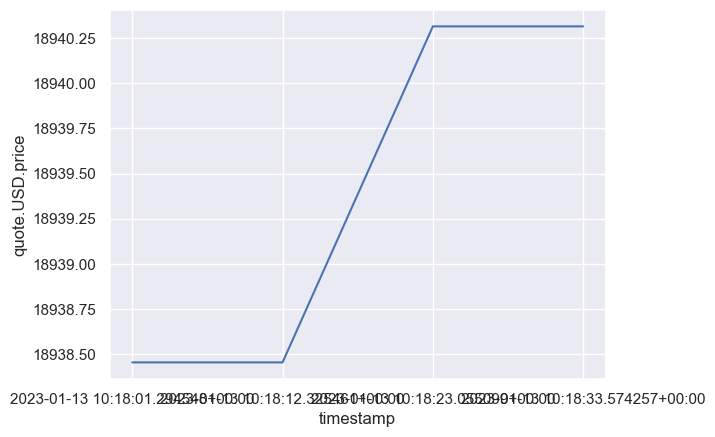

In [38]:
# let's create a line plot to show the change of BTC over the time we pulled the data 
# ideally we should convert the timestamps to a better format 

sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=df_price)
plt.show()